# Assignment 2

# Logistic Regression

## Part 0: Useful imports and methods

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
def read_file(file_name, delimiter=','):
    points = np.loadtxt(file_name, delimiter=delimiter)
    m = points.shape[0]
    n = points.shape[1] - 1
    return points[..., 0:n], points[..., n:], m, n

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def h(X, theta):
    # X is a matrix and theta is a vector
    return sigmoid(np.matmul(X, theta))

def single_h(x, theta):
    # x and theta are both vectors
    return sigmoid(np.matmul(theta.T, x))

def predict(x, theta):
    if single_h(x, theta) >= 0.5:
        return 1
    return 0

# cost function, if lmd (lambda) is passed nonzero when calling, it will get the regularized cost function
def cost(X, y, theta, lmd=0):
    n = X.shape[1]
    m = X.shape[0]
    theta = theta.reshape((n, 1))
    # we do not penalize theta0
    penalize = np.matmul(theta.T, theta) - theta[0][0]**2
    ans = np.matmul(y.T, np.log(h(X, theta))) + np.matmul((1 - y).T, np.log(1 - h(X, theta)))
    ans = ans * (-1 / m)
    ans += (lmd / (2 * m)) * penalize
    return ans

def get_accuracy(X, theta, y):
    n = X.shape[1]
    m = X.shape[0]
    corrects = 0
    for i in range(0, m):
        x = np.array([X[i]]).T
        prediction = predict(x, theta)
    
        if prediction == y[i][0]:
            corrects += 1
    return (100 * corrects) / m
    

## Part 1: Not Regularized

### Implementation

In [3]:
# read the file:
X, y, m, n = read_file('ex2data1.txt', ',')

# add x0s
# we wouldn't need to add x0s if we were working with scikit
# NOTICE THAT X IS THE ORIGINAL DATA FROM THE FILE, AND my_X IS NEW MATRIX AFTER APPENDING x0S
x0s = np.ones((m, 1))
my_X = np.append(x0s, X, axis=1)

# initialize theta:
# why n+1? because of x0!
theta = np.zeros((n+1, 1))

# optimize:
theta = minimize(lambda t: cost(my_X, y, t), theta, method='Nelder-Mead').x.reshape((n+1, 1))


### Accuracy

In [4]:
print('Training accuracy: %{0}'.format(get_accuracy(my_X, theta, y)))

Training accuracy: %89.0


### Plot

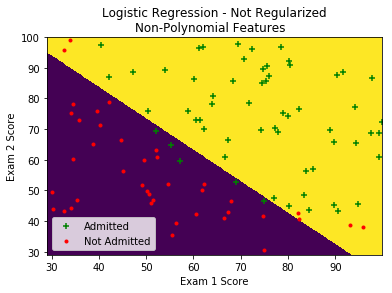

In [5]:
plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 Score')
plt.title('Logistic Regression - Not Regularized\nNon-Polynomial Features  ')

# plotting decision boundary:
x_min, x_max = X[..., 0].min() - 1, X[..., 1].max() + 1
y_min, y_max = X[..., 0].min() - 1, X[..., 1].max() + 1
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
x_range = np.arange(x_min, x_max, 0.1)
y_range = np.arange(y_min, y_max, 0.1)
xx, yy = np.meshgrid(x_range, y_range)

zz = np.zeros(xx.shape)
for i in range(zz.shape[1]):
    for j in range(zz.shape[1]):
        x_vector = np.array([[1, xx[i][j], yy[i][j]]]).T
        zz[i][j] = predict(x_vector, theta)
        
plt.pcolormesh(xx, yy, zz)


# plotting the points:
z_x = []
z_y = []
o_x = []
o_y = []
for i in range(0, X.shape[0]):
    if y[i][0] == 1:
        o_x.append(X[i][0])
        o_y.append(X[i][1])
    else:
        z_x.append(X[i][0])
        z_y.append(X[i][1])

plt.scatter(o_x, o_y, marker='+', c='g', label='Admitted')
plt.scatter(z_x, z_y, marker='.', c='r', label='Not Admitted')
plt.legend()
plt.show()

## Part 2: Regularized, polynomial features

### Implementation

In [6]:
X, y, m, n = read_file('ex2data2.txt', ',')
poly = PolynomialFeatures(degree=10)

# before making features polynomial:
original_X = X

X = poly.fit_transform(X)

# now we have new features:
n = X.shape[1]

# initialize theta:
theta = np.zeros((n, 1))

# optimize:
overfit = minimize(lambda t: cost(X, y, t, lmd=0), theta, method='Nelder-Mead').x.reshape((n, 1))
fit = minimize(lambda t: cost(X, y, t, lmd=1), theta, method='Nelder-Mead').x.reshape((n, 1))
underfit = minimize(lambda t: cost(X, y, t, lmd=100), theta, method='Nelder-Mead').x.reshape((n, 1))

### Accuracy

In [7]:
print('Overfit accuracy: %{0}'.format(get_accuracy(X, overfit, y)))
print('Fit accuracy: %{0}'.format(get_accuracy(X, fit, y)))
print('Underfit accuracy: %{0}'.format(get_accuracy(X, underfit, y)))

Overfit accuracy: %80.50847457627118
Fit accuracy: %76.27118644067797
Underfit accuracy: %66.94915254237289


### Plot (fit answer)

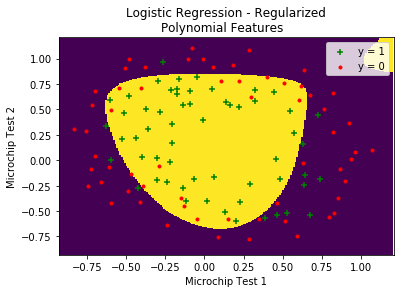

In [8]:
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.title('Logistic Regression - Regularized\nPolynomial Features  ')

# plotting decision boundary:
x_min, x_max = original_X[..., 0].min() - 0.1, original_X[..., 1].max() + 0.1
y_min, y_max = original_X[..., 0].min() - 0.1, original_X[..., 1].max() + 0.1
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
x_range = np.arange(x_min, x_max, 0.01)
y_range = np.arange(y_min, y_max, 0.01)
xx, yy = np.meshgrid(x_range, y_range)

zz = np.zeros(xx.shape)
for i in range(zz.shape[1]):
    for j in range(zz.shape[1]):
        x_vector = np.array([[xx[i][j], yy[i][j]]])
        x_vector = poly.fit_transform(x_vector).ravel()
        x_vector = x_vector.reshape((n, 1))
        zz[i][j] = predict(x_vector, fit)
        
plt.pcolormesh(xx, yy, zz)


# plotting the points:
z_x = []
z_y = []
o_x = []
o_y = []
for i in range(0, original_X.shape[0]):
    if y[i][0] == 1:
        o_x.append(original_X[i][0])
        o_y.append(original_X[i][1])
    else:
        z_x.append(original_X[i][0])
        z_y.append(original_X[i][1])

plt.scatter(o_x, o_y, marker='+', c='g', label='y = 1')
plt.scatter(z_x, z_y, marker='.', c='r', label='y = 0')
plt.legend()
plt.show()